In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from pynauty import *
import ipyvolume as ipv

In [4]:
g1=Graph(number_of_vertices=5,
 adjacency_dict={0: [1, 2, 3, 4], 2: [3]})

g6=Graph(number_of_vertices=5, directed=False,
 adjacency_dict={0: [1, 2, 3, 4], 1: [0], 2: [0, 3],3:[0, 2], 4:[0]}, vertex_coloring = [],)

g2=Graph(number_of_vertices=5, directed=False,
 adjacency_dict={0: [1], 1: [2, 3, 4], 3: [4],}, vertex_coloring = [],)

g3=Graph(number_of_vertices=5, directed=False,
 adjacency_dict={0: [2],1: [2],2: [3, 4],}, vertex_coloring = [],)

g4=Graph(number_of_vertices=5, directed=False,
 adjacency_dict={0: [1, 2, 3, 4],}, vertex_coloring = [],)

g5=Graph(number_of_vertices=5, directed=False,
 adjacency_dict={0: [1, 4],1: [4],2: [4],3: [4],}, vertex_coloring = [],)

isomorphic(g1, g6)

True

# A developing version 

1. The intention is to produce all the configurations possible for a system for a fixed box volume and fixed # of particles. Not working now, because of indentation and logical order of the code. Instead of giving (trial)# configurations in a textfile(graphs.txt), it only outputs the last configuration. The plot also only prints the last configuration g(trial-1).

## Update: The previous problem is fixed on 3/22/2019.

2. The next target is to avoid configurations where there's a disconnected graph.



<Figure size 432x288 with 0 Axes>

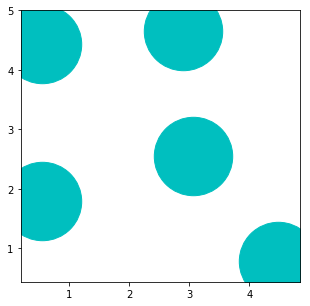

<Figure size 432x288 with 0 Axes>

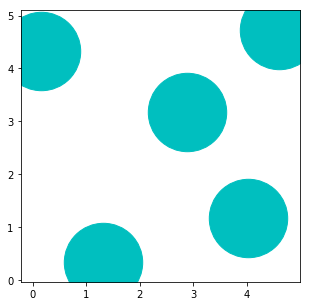

<Figure size 432x288 with 0 Axes>

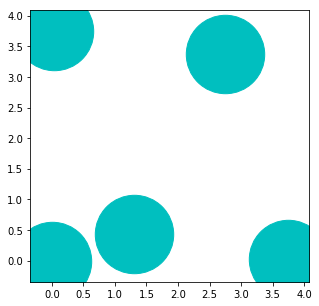

<Figure size 432x288 with 0 Axes>

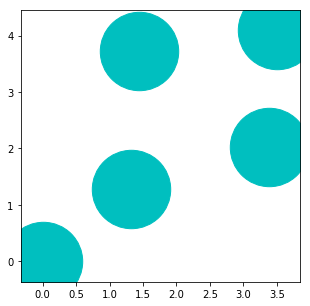

<Figure size 432x288 with 0 Axes>

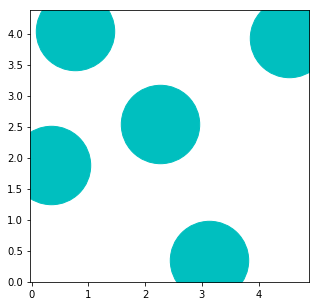

<Figure size 432x288 with 0 Axes>

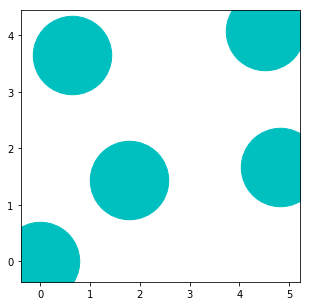

<Figure size 432x288 with 0 Axes>

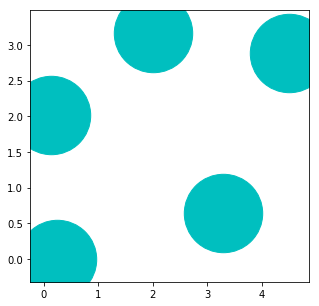

<Figure size 432x288 with 0 Axes>

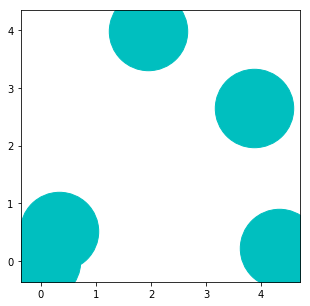

<Figure size 432x288 with 0 Axes>

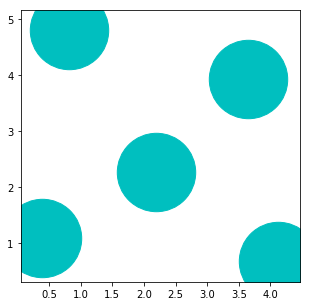

<Figure size 432x288 with 0 Axes>

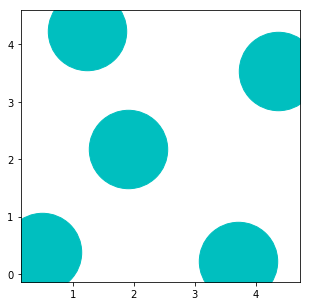

In [5]:
import timeit
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random 

# The Delone parameters
r, R=1., 2.5 

# Set the number of particles that are going to be randomly introduced 
particles=5

boxlen = np.genfromtxt('min_box.txt', comments='#', delimiter=" ")
maxrad = boxlen[:100,1]    ## The maximum radius of circles fits in a square box of unit length.
leng = r/maxrad
x_min, y_min, z_min = 0., 0., 0.
x_max, y_max, z_max = leng[particles-1], leng[particles-1], leng[particles-1]

# The number of points in the sample from which atoms are selected.
N=50;  

dist=np.full((N,N,N),0.0) #[[[0 for z in range(N)] for x in range(N)] for y in range(N)] 
xf=np.full((N,N),0.0)       #[[0 for z in range(N)] for x in range(N)]
yf=np.full((N,N),0.0)       #[[0 for z in range(N)] for x in range(N)]
zf=np.full((N,N),0.0)       #[[0 for z in range(N)] for x in range(N)]

with open("graphs.txt","w") as outfile:
    volume=[]
    for trial in range(10):
        outstring ='\n'
        outstring += 'g' + str(trial) + '=Graph(number_of_vertices=' + str(particles) + ' , adjacency_dict={'

        #while loop starts here.
        while (xf[particles][:particles] == np.full_like(xf[particles][:particles], 0.)).all():  ## While loop to always output non-zeroes
            for i in range(N):
                xf[0][i]=(x_min+random.uniform(0., 1.)*(x_max-x_min))
                yf[0][i]=(y_min+random.uniform(0., 1.)*(y_max-y_min))
                zf[0][i]=0.0

            for i in range(N):
                for j in range(N):
                    dist[i][j][0]=(((xf[0][i]-xf[0][j])**2 + (yf[0][i]-yf[0][j])**2 + (zf[0][i]-zf[0][j])**2)**0.5)

            ## The loops to select the atomic coordinates
            s=N
            for j in range(particles):
                k=0
                for i in range(s):
                    if dist[i][j][j] >= 2*r:
                        xf[j+1][k] = xf[j][i];      ## If distance is greater than the optimum, point is chosen.
                        yf[j+1][k] = yf[j][i];
                        zf[j+1][k] = zf[j][i];
                        k +=1;                      ## k is the # of successful selection of particles. 
                    elif i==j:                      ## When the 'i loop' ends, k = # of particles.
                        xf[j+1][k] = xf[j][i];
                        yf[j+1][k] = yf[j][i];      ## i=j should be accommodated.
                        zf[j+1][k] = zf[j][i];
                        k +=1;
                    else:
                        k=k          ## If the point is closer than 2*r, don't increment k.
            
                s=k
                for m in range(s):
                    for l in range(s):
                        dist[m][l][j+1]=(((xf[j+1][m]-xf[j+1][l])**2+(yf[j+1][m]-yf[j+1][l])**2+(zf[j+1][m]-zf[j+1][l])**2)**0.5)
        #while loop ends here.
                
        ## The position (xf, yf, zf) of the selected particle after the screening will be xf[particles][:particles]

        
        
        
        plt.figure(1)
        plt.figure(figsize=(5,5))
        plt.scatter(xf[particles][:particles], yf[particles][:particles], c='c', marker='o', s=6150)
        plt.show()
        
        for i in range(particles):
            outstring += str(i)+':['
            for j in range(particles):
                if dist[i][j][particles] <= R and i != j:
                    outstring += str(j) + ','
            outstring += '],'
        outstring += '})\n\n'
        outfile.write(outstring)
        
        ## This is to reset the 
        xf=np.full((N,N),0.0) # arrays xf, yf and zf to zero       
        yf=np.full((N,N),0.0) # for the trial loop to give    
        zf=np.full((N,N),0.0) # maximum configurations.     
        
plt.show()